# MegaSena Storytelling

- **Aluno**: Felipe Morais da Silva
- **Matrícula**: 20170062872  

## Cenário

Imaginem que vocês foram selecionados para uma entrevista de emprego para o cargo de **Cientista de Dados** de uma grande empresa multinacional. A seleção será baseada em vários critérios, destacando as seguintes habilidades: resolução de problemas, criatividade, interpretação, escrita, organização, inovação, proeficiência em pandas, análise exploratória de dados e storytelling. Foi passado para vocês o dataset contendo todos os resultados da Megasena (*baseados.xlsx*), o **desafio** consiste em **interpretar** esses dados e **criar um significado** de entendimento conciso e claro.

## Requisitos

Para realizar a atividade, é necessário:

 - Utilizar apenas o dataset disponibilizado para essa atividade.
 - Criar um repositório no Github para a atividade.
 - Enviar apenas o link do respectivo repositório.
 - Criar um notebook descrevendo todos os códigos realizados. 
 - Todos os códigos precisam estar bem documentados.
 - Vocês precisam gerar no máximo 4 figuras.
 - Cada figura deve acompanhar uma célula com um texto descritivo, demonstrando todo o resultado encontrado. 
 - Seja inovador.

## A Mega-Sena

A [Mega-Sena](https://pt.wikipedia.org/wiki/Mega-Sena) é uma entre as dez modalidades atuais das loterias da Caixa Econômica Federal com sorteios ordinários, duas vezes por semana. Para jogar na Mega-Sena, é necessário escolher **6 números** de **1 a 60** e, caso haja coinciência entre os 6 valores jogados com os 6 valores sorteados, independentemente da ordem, o jogador poderá ganhar o prêmio máximo. Há a possibilidade de ganhar parte do prêmio, caso o jogador acerte menos dezenas.

Para determinar o [valor dos prêmios](https://www.infoescola.com/curiosidades/mega-sena/), o prêmio final é distribuído da seguinte forma:

 - 35% do total para a Sena;
 - 19% do total para a Quina;
 - 19% do total para a Quadra;
 - 22% é acumulado para o próximo sorteio.

Para apostar na Mega-Sena, o jogador deve comprar um bilhete por RS 3,50 e preencher seus números. Hoje (24/04/2018), a estimativa do [prêmio total](http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/) para o próximo concurso é de RS 3.000.000,00.

Ou seja, com um pequeno investimento de RS 3,50 é possível ganhar mais de 1 milhão de reais. Parece incrível, não? Mas é claro que não é tão simples assim, afinal, não vemos novos milionários todos os dias. 

Então, qual seria a real probabilidade de ganhar a sena?

A resposta é dada com base no simples princípio multiplicativo. Para a escolha do primeiro número existirão 60 possibilidades; para o segundo, 59; para o terceiro, 58, e assim por diante. 

Assim, temos

> 60 x 59 x 58 x 57 x 56 x 55 = **36.045.979.200**

possibilidades de jogos. Porém, como a ordem não importa, é necessário dividir esse valor pela **permutação dos 6 números**, isto é, por **6!**.

> **jogos totais** = (36.045.979.200 / 6!) = 50.063.860

Ou seja, a chance de acertar uma sena é de **1 em 50 milhões** (ou ainda, 2e-8).

## Discussão

No decorrer deste trabalho, meu objetivo investigar se é possível encontrar uma sequência de números que possua maior possibilidade de vitória.

Para isso, iremos utilizar dados, disponibilizados pela própria Caixa, relativos a todos seus concursos, desde o primeiro até o mais recente.

In [ ]:
# Instala as bibliotecas, caso ainda não tenham sido instaladas

!pip install pandas
!pip install matplotlib
!pip install xlrd

In [24]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Carregar a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprimir as cinco primeiras linhas do dataframe
columns = ['Concurso', 'Data Sorteio', 'Dezena1', 'Dezena2', 'Dezena3', 'Dezena4',
       'Dezena5', 'Dezena6', 'Arrecadacao_Total', 'Ganhadores_Sena',
       'Rateio_Sena', 'Acumulado', 'Valor_Acumulado', 'Estimativa_Prêmio']

Ao todo, foram realizados 

In [25]:
dados.Concurso.sum()

2051325

concursos, dos quais, apenas 

In [26]:
dados.Ganhadores_Sena.sum()

691

pessoas ganharam o prêmio máximo, isto é, a sena.

A base de dados não informa quantas apostas foram feitas por concurso, porém, com base na quantidade de vencedores (691) é possível estimar, de forma grosseira, a quantidade de tentativas não repetidas no decorrer dos concursos

In [28]:
dados.Ganhadores_Sena.sum() * 50000000

34550000000

Para procurar por uma sequência com maior probabilidade de acerto, é necessário analisar a frequência de cada dezena

In [83]:
# Pega os números mais recorrentes
frequency_numbers = dados.iloc[:,2:8].unstack().value_counts()

# Atribui as colunas à a referentes aos valores e índices
a = pd.DataFrame()
a['fn'] = frequency_numbers
a['idx'] = frequency_numbers.index

# Reordena os valores de forma decrescente (com base no índice)
a = a.sort_values(by=['idx'])


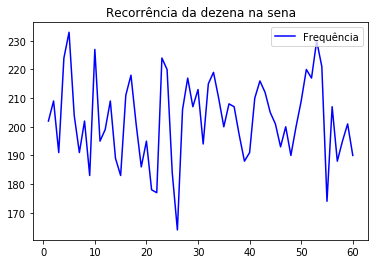

In [84]:
# Plota o gráfico da recorrência dos valores da dezena
plt.plot(a.idx, 
         a.fn, c='blue', label='Frequência')
plt.legend(loc='upper right')
plt.title('Recorrência da dezena na sena')
plt.show()

Na figura acima, é possível observar que a frequência de cada dezena possui uma variação aceitável, no intervalo [164, 233], cuja média é 202.

In [74]:
a.fn.min() # menor frequência

164

In [75]:
a.fn.max() # maior frequência

233

In [77]:
a.fn.mean() # média

202.5

Note que, com uma quantidade de concursos tendendo a infinito, as frequências das dezenas devem se estabilizar por igual, por meio de uma [convergência](http://www.portalaction.com.br/probabilidades/711-convergencias-em-probabilidade-e-quase-certa).

Assim, de forma simplificada, é razoável imaginar que, quanto menor a frequência de uma dezena, maior será sua chance de ser a próxima a ser escolhida.

In [89]:
a = a.sort_values(by=['fn'], ascending=True)
a.head(6)

,fn,idx
26,164,26
55,174,55
22,177,22
21,178,21
15,183,15
9,183,9


Portanto, as dezenas 26, 55, 22, 21, 15, 9 poderiam ser candidatos interessantes para serem apostados.

De qualquer forma, a probabilidade individual de cada dezena continua a mesma e você pode contar, principalmente, com o acaso.